In [19]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras

In [20]:
X_train = np.load('D:\MateRate\X_train.npy') 
Y_train = np.load('D:\MateRate\Y_train.npy')
X_test = np.load('D:\MateRate\X_test.npy')

In [21]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)

(4160, 50, 50, 3)
(4160,)
(1387, 50, 50, 3)


In [22]:
Y_train = np.reshape(Y_train, (-1, 1))

In [23]:
Y_train.shape

(4160, 1)

In [24]:
Y_val= np.split(Y_train, [4000, 4160])[1]
Y_train= np.split(Y_train, [4000, 4160])[0]

X_val=np.split(X_train, [4000, 4160])[1]
X_train=np.split(X_train, [4000, 4160])[0]

print(X_train.shape)
print(X_val.shape)
print(Y_train.shape)
print(Y_val.shape)

(4000, 50, 50, 3)
(160, 50, 50, 3)
(4000, 1)
(160, 1)


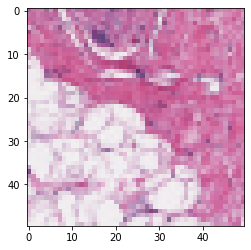

In [27]:
#plotting an image
import matplotlib.pyplot as plt
img = X_train[100]/255
imgplot = plt.imshow(img)

In [28]:
np.count_nonzero(Y_train == 1)

2014

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [68]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = (50, 50, 3), activation = 'relu'))

model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Conv2D(256, (3, 3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Flatten())

model.add(Dense(units = 256, activation = 'relu'))
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dense(units = 2, activation = 'softmax'))


In [69]:
from keras import optimizers
adam = optimizers.adam(lr=0.005)
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [70]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_58 (Conv2D)           (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 22, 22, 128)       36992     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 9, 9, 256)         295168    
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 4, 4, 256)         0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 4, 4, 256)       

In [71]:
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=12)

Train on 4000 samples, validate on 160 samples
Epoch 1/12
4000/4000 [==============================] - 14s 4ms/sample - loss: 1.1956 - accuracy: 0.6338 - val_loss: 0.6622 - val_accuracy: 0.6125
Epoch 2/12
4000/4000 [==============================] - 15s 4ms/sample - loss: 0.5674 - accuracy: 0.7150 - val_loss: 0.5968 - val_accuracy: 0.7063
Epoch 3/12
4000/4000 [==============================] - 15s 4ms/sample - loss: 0.5878 - accuracy: 0.7053 - val_loss: 0.5928 - val_accuracy: 0.6938
Epoch 4/12
4000/4000 [==============================] - 15s 4ms/sample - loss: 0.5540 - accuracy: 0.7335 - val_loss: 0.5587 - val_accuracy: 0.6875
Epoch 5/12
4000/4000 [==============================] - 15s 4ms/sample - loss: 0.5571 - accuracy: 0.7240 - val_loss: 0.6067 - val_accuracy: 0.7000
Epoch 6/12
4000/4000 [==============================] - 15s 4ms/sample - loss: 0.5640 - accuracy: 0.7195 - val_loss: 0.5700 - val_accuracy: 0.7375
Epoch 7/12
4000/4000 [==============================] - 15s 4ms/sample 

In [73]:
model_json = model.to_json()
with open("model_brca.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_brca.h5")
print("Saved model to disk")

Saved model to disk


In [87]:
predictions = model.predict(X_test)

In [88]:
print(predictions.shape)
predictions

(1387, 2)


array([[0.9127079 , 0.08729207],
       [0.19286522, 0.80713475],
       [0.585432  , 0.41456804],
       ...,
       [0.9024787 , 0.0975213 ],
       [0.87499857, 0.12500137],
       [0.15289271, 0.8471073 ]], dtype=float32)

In [89]:
pred = predictions[:, 1]
pred = np.reshape(pred, (-1, 1))
print(pred.shape)
pred

(1387, 1)


array([[0.08729207],
       [0.80713475],
       [0.41456804],
       ...,
       [0.0975213 ],
       [0.12500137],
       [0.8471073 ]], dtype=float32)

In [90]:
num = pred.shape[0]
for i in range(0, num):
    if pred[i]>=0.5:
        pred[i]=1
    else:
        pred[i]=0

In [93]:
print(pred.shape)
pred

(1387, 1)


array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]], dtype=float32)

In [94]:
np.count_nonzero(pred == 1)

765

In [97]:
np.savetxt("submission.csv", pred, delimiter=",")

SyntaxError: invalid syntax (<ipython-input-97-00e8942624a9>, line 1)